In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# <font color = blue> IMDb Movie Assignment </font>

You have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, you will try to find some interesting insights into these movies and their voters, using Python.

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [3]:
# Read the csv file using 'read_csv'. Please write your dataset location here.

movies = pd.read_csv("Movie+Assignment+Data.csv")
movies.head()

Title  title_year     budget      Gross      actor_1_name  \
0             La La Land        2016   30000000  151101803      Ryan Gosling   
1               Zootopia        2016  150000000  341268248  Ginnifer Goodwin   
2                   Lion        2016   12000000   51738905         Dev Patel   
3                Arrival        2016   47000000  100546139         Amy Adams   
4  Manchester by the Sea        2016    9000000   47695371     Casey Affleck   

         actor_2_name     actor_3_name  actor_1_facebook_likes  \
0          Emma Stone       Amiée Conn                   14000   
1       Jason Bateman       Idris Elba                    2800   
2       Nicole Kidman      Rooney Mara                   33000   
3       Jeremy Renner  Forest Whitaker                   35000   
4  Michelle Williams     Kyle Chandler                     518   

   actor_2_facebook_likes  actor_3_facebook_likes  ...  Votes3044M Votes3044F  \
0                 19000.0                     NaN  ...         7.9        7.8   
1                 28000.0                 27000.0  ...         7.8        8.1   
2                 96000.0                  9800.0  ...         7.9        8.2   
3                  5300.0                     NaN  ...         7.8        7.8   
4                 71000.0                  3300.0  ...         7.7        7.7   

  Votes45A Votes45AM  Votes45AF  Votes1000  VotesUS  VotesnUS  content_rating  \
0      7.6       7.6        7.5        7.1      8.3       8.1           PG-13   
1      7.8       7.8        8.1        7.6      8.0       8.0              PG   
2      8.0       7.9        8.4        7.1      8.1       8.0           PG-13   
3      7.6       7.6        7.7        7.3      8.0       7.9           PG-13   
4      7.6       7.6        7.6        7.1      7.9       7.8               R   

     Country  
0        USA  
1        USA  
2  Australia  
3        USA  
4        USA  

[5 rows x 62 columns]

In [4]:
movies.tail()

Title  title_year     budget  \
95                                      Whiplash        2014    3300000   
96                               Before Midnight        2013    3000000   
97    Star Wars: Episode VII - The Force Awakens        2015  245000000   
98  Harry Potter and the Deathly Hallows: Part I        2010  150000000   
99                       Tucker and Dale vs Evil        2010    5000000   

        Gross              actor_1_name     actor_2_name  \
95   13092000              J.K. Simmons  Melissa Benoist   
96    8114507  Seamus Davey-Fitzpatrick     Ariane Labed   
97  936662225               Doug Walker       Rob Walker   
98  296347721              Rupert Grint       Toby Jones   
99     223838            Katrina Bowden     Tyler Labine   

              actor_3_name  actor_1_facebook_likes  actor_2_facebook_likes  \
95            Chris Mulkey                   24000                   970.0   
96  Athina Rachel Tsangari                     140                    63.0   
97                       0                     131                    12.0   
98            Alfred Enoch                   10000                  2000.0   
99          Chelan Simmons                     948                   779.0   

    actor_3_facebook_likes  ...  Votes3044M Votes3044F Votes45A Votes45AM  \
95                   535.0  ...         8.3        8.2      8.1       8.1   
96                    48.0  ...         7.8        7.6      7.3       7.4   
97                     0.0  ...         7.9        8.2      7.9       7.8   
98                  1000.0  ...         7.3        8.1      7.4       7.3   
99                   440.0  ...         7.5        7.7      7.5       7.4   

    Votes45AF  Votes1000  VotesUS  VotesnUS  content_rating  Country  
95        8.2        8.0      8.6       8.4               R      USA  
96        7.2        7.0      8.0       7.9               R      USA  
97        8.2        7.7      8.2       7.9           PG-13      USA  
98        8.0        6.7      7.9       7.5           PG-13       UK  
99        7.7        7.1      7.7       7.5               R   Canada  

[5 rows x 62 columns]

- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [5]:
# Check the number of rows and columns in the dataframe
movies.shape

(100, 62)

In [6]:
# Check the column-wise info of the dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [7]:
# Check the summary for the numeric columns 
movies.describe()

title_year        budget         Gross  actor_1_facebook_likes  \
count   100.000000  1.000000e+02  1.000000e+02              100.000000   
mean   2012.820000  7.838400e+07  1.468679e+08            13407.270000   
std       1.919491  7.445295e+07  1.454004e+08            10649.037862   
min    2010.000000  3.000000e+06  2.238380e+05               39.000000   
25%    2011.000000  1.575000e+07  4.199752e+07             1000.000000   
50%    2013.000000  4.225000e+07  1.070266e+08            13000.000000   
75%    2014.000000  1.500000e+08  2.107548e+08            20000.000000   
max    2016.000000  2.600000e+08  9.366622e+08            35000.000000   

       actor_2_facebook_likes  actor_3_facebook_likes  IMDb_rating  \
count               99.000000               98.000000   100.000000   
mean              7377.303030             3002.153061     7.883000   
std              13471.568216             6940.301133     0.247433   
min                 12.000000                0.000000     7.500000   
25%                580.000000              319.750000     7.700000   
50%               1000.000000              626.500000     7.800000   
75%              11000.000000             1000.000000     8.100000   
max              96000.000000            46000.000000     8.800000   

       MetaCritic     Runtime       CVotes10  ...  Votes1829F   Votes3044  \
count   95.000000  100.000000     100.000000  ...  100.000000  100.000000   
mean    78.252632  126.420000   73212.160000  ...    7.982000    7.732000   
std      9.122066   19.050799   82669.594746  ...    0.321417    0.251814   
min     62.000000   91.000000    6420.000000  ...    7.300000    7.300000   
25%     72.000000  114.750000   30587.000000  ...    7.700000    7.600000   
50%     78.000000  124.000000   54900.500000  ...    8.000000    7.700000   
75%     83.500000  136.250000   80639.000000  ...    8.200000    7.900000   
max    100.000000  180.000000  584839.000000  ...    8.800000    8.700000   

       Votes3044M  Votes3044F   Votes45A   Votes45AM   Votes45AF   Votes1000  \
count  100.000000  100.000000  100.00000  100.000000  100.000000  100.000000   
mean     7.723000    7.780000    7.65100    7.624000    7.770000    7.274000   
std      0.260479    0.282128    0.21485    0.213258    0.301344    0.361987   
min      7.200000    7.200000    7.10000    7.100000    7.000000    6.400000   
25%      7.500000    7.600000    7.50000    7.475000    7.500000    7.100000   
50%      7.700000    7.800000    7.65000    7.600000    7.800000    7.300000   
75%      7.900000    8.000000    7.80000    7.800000    7.925000    7.500000   
max      8.700000    8.500000    8.10000    8.100000    8.500000    8.200000   

          VotesUS    VotesnUS  
count  100.000000  100.000000  
mean     7.958000    7.793000  
std      0.232327    0.264099  
min      7.500000    7.300000  
25%      7.800000    7.600000  
50%      7.950000    7.750000  
75%      8.100000    7.925000  
max      8.700000    8.800000  

[8 rows x 53 columns]

In [8]:
# checking the data types of their variables
movies.dtypes

Title              object
title_year          int64
budget              int64
Gross               int64
actor_1_name       object
                   ...   
Votes1000         float64
VotesUS           float64
VotesnUS          float64
content_rating     object
Country            object
Length: 62, dtype: object

In [9]:
movies.isnull().sum()
# no null values so we can move ahead for data cleaning process

Title             0
title_year        0
budget            0
Gross             0
actor_1_name      0
                 ..
Votes1000         0
VotesUS           0
VotesnUS          0
content_rating    0
Country           0
Length: 62, dtype: int64

## Task 2: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 2.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [10]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'
movies.head()

Title  title_year     budget      Gross      actor_1_name  \
0             La La Land        2016   30000000  151101803      Ryan Gosling   
1               Zootopia        2016  150000000  341268248  Ginnifer Goodwin   
2                   Lion        2016   12000000   51738905         Dev Patel   
3                Arrival        2016   47000000  100546139         Amy Adams   
4  Manchester by the Sea        2016    9000000   47695371     Casey Affleck   

         actor_2_name     actor_3_name  actor_1_facebook_likes  \
0          Emma Stone       Amiée Conn                   14000   
1       Jason Bateman       Idris Elba                    2800   
2       Nicole Kidman      Rooney Mara                   33000   
3       Jeremy Renner  Forest Whitaker                   35000   
4  Michelle Williams     Kyle Chandler                     518   

   actor_2_facebook_likes  actor_3_facebook_likes  ...  Votes3044M Votes3044F  \
0                 19000.0                     NaN  ...         7.9        7.8   
1                 28000.0                 27000.0  ...         7.8        8.1   
2                 96000.0                  9800.0  ...         7.9        8.2   
3                  5300.0                     NaN  ...         7.8        7.8   
4                 71000.0                  3300.0  ...         7.7        7.7   

  Votes45A Votes45AM  Votes45AF  Votes1000  VotesUS  VotesnUS  content_rating  \
0      7.6       7.6        7.5        7.1      8.3       8.1           PG-13   
1      7.8       7.8        8.1        7.6      8.0       8.0              PG   
2      8.0       7.9        8.4        7.1      8.1       8.0           PG-13   
3      7.6       7.6        7.7        7.3      8.0       7.9           PG-13   
4      7.6       7.6        7.6        7.1      7.9       7.8               R   

     Country  
0        USA  
1        USA  
2  Australia  
3        USA  
4        USA  

[5 rows x 62 columns]

In [11]:
movies.budget = movies.budget.apply(lambda x : round(x/1000000,2))

In [12]:
movies.Gross = movies.Gross.apply(lambda x : round(x/1000000,2))

In [13]:
movies.budget.value_counts()

12.0     6
165.0    5
15.0     5
170.0    4
25.0     4
30.0     3
150.0    3
100.0    3
40.0     3
200.0    3
18.0     2
160.0    2
28.0     2
20.0     2
250.0    2
60.0     2
14.0     2
13.0     2
61.0     2
5.0      2
38.0     2
130.0    1
135.0    1
145.0    1
108.0    1
190.0    1
175.0    1
178.0    1
180.0    1
90.0     1
220.0    1
225.0    1
260.0    1
9.0      1
47.0     1
93.0     1
3.3      1
80.0     1
81.2     1
3.0      1
8.9      1
4.0      1
7.0      1
8.0      1
8.5      1
16.0     1
17.0     1
19.0     1
21.0     1
69.0     1
23.0     1
35.0     1
37.0     1
44.5     1
46.0     1
50.0     1
55.0     1
245.0    1
68.0     1
58.0     1
Name: budget, dtype: int64

-  ###  Subtask 2.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [14]:
# Create the new column named 'profit' by subtracting the 'budget' column from the 'gross' column
movies['profit'] = movies['Gross'] - movies['budget']

In [15]:
movies.profit

0     121.10
1     191.27
2      39.74
3      53.55
4      38.70
       ...  
95      9.79
96      5.11
97    691.66
98    146.35
99     -4.78
Name: profit, Length: 100, dtype: float64

In [16]:
# Sort the dataframe with the 'profit' column as reference using the 'sort_values' function. Make sure to set the argument
#'ascending' to 'False'

movies = movies.sort_values("profit", ascending = False)
movies['profit']

97    691.66
11    403.28
47    305.02
32    294.65
12    214.98
       ...  
46    -28.51
7     -59.19
17    -77.81
39    -79.86
22    -96.18
Name: profit, Length: 100, dtype: float64

In [17]:
# Get the top 10 profitable movies by using position based indexing. Specify the rows till 10 (0-9)
top10  = movies.head(10)
top10

Title  title_year  budget   Gross  \
97  Star Wars: Episode VII - The Force Awakens        2015   245.0  936.66   
11                                The Avengers        2012   220.0  623.28   
47                                    Deadpool        2016    58.0  363.02   
32             The Hunger Games: Catching Fire        2013   130.0  424.65   
12                                 Toy Story 3        2010   200.0  414.98   
8                        The Dark Knight Rises        2012   250.0  448.13   
45                              The Lego Movie        2014    60.0  257.76   
1                                     Zootopia        2016   150.0  341.27   
41                               Despicable Me        2010    69.0  251.50   
18                                  Inside Out        2015   175.0  356.45   

         actor_1_name       actor_2_name           actor_3_name  \
97        Doug Walker         Rob Walker                      0   
11    Chris Hemsworth  Robert Downey Jr.     Scarlett Johansson   
47      Ryan Reynolds          Ed Skrein         Stefan Kapicic   
32  Jennifer Lawrence    Josh Hutcherson  Sandra Ellis Lafferty   
12          Tom Hanks  John Ratzenberger            Don Rickles   
8           Tom Hardy     Christian Bale   Joseph Gordon-Levitt   
45     Morgan Freeman       Will Ferrell            Alison Brie   
1    Ginnifer Goodwin      Jason Bateman             Idris Elba   
41       Steve Carell   Miranda Cosgrove          Jack McBrayer   
18        Amy Poehler       Mindy Kaling          Phyllis Smith   

    actor_1_facebook_likes  actor_2_facebook_likes  actor_3_facebook_likes  \
97                     131                    12.0                     0.0   
11                   26000                 21000.0                 19000.0   
47                   16000                   805.0                   361.0   
32                   34000                 14000.0                   523.0   
12                   15000                  1000.0                   721.0   
8                    27000                 23000.0                 23000.0   
45                   11000                  8000.0                  2000.0   
1                     2800                 28000.0                 27000.0   
41                    7000                  2000.0                   975.0   
18                    1000                   767.0                   384.0   

    ...  Votes3044F Votes45A Votes45AM Votes45AF  Votes1000  VotesUS  \
97  ...         8.2      7.9       7.8       8.2        7.7      8.2   
11  ...         8.1      7.9       7.9       8.1        7.4      8.3   
47  ...         7.9      7.8       7.8       7.9        7.3      8.1   
32  ...         7.9      7.3       7.2       7.9        6.7      7.7   
12  ...         8.3      8.1       8.1       8.1        8.1      8.5   
8   ...         8.2      7.9       7.9       7.9        7.8      8.4   
45  ...         7.5      7.4       7.4       7.4        7.2      8.0   
1   ...         8.1      7.8       7.8       8.1        7.6      8.0   
41  ...         7.9      7.6       7.5       7.9        7.0      7.6   
18  ...         8.1      7.9       7.9       7.9        7.6      8.2   

    VotesnUS  content_rating    Country  profit  
97       7.9           PG-13        USA  691.66  
11       7.9           PG-13        USA  403.28  
47       7.9               R        USA  305.02  
32       7.4           PG-13        USA  294.65  
12       8.3               G        USA  214.98  
8        8.4           PG-13        USA  198.13  
45       7.6              PG  Australia  197.76  
1        8.0              PG        USA  191.27  
41       7.6              PG        USA  182.50  
18       8.1              PG        USA  181.45  

[10 rows x 63 columns]

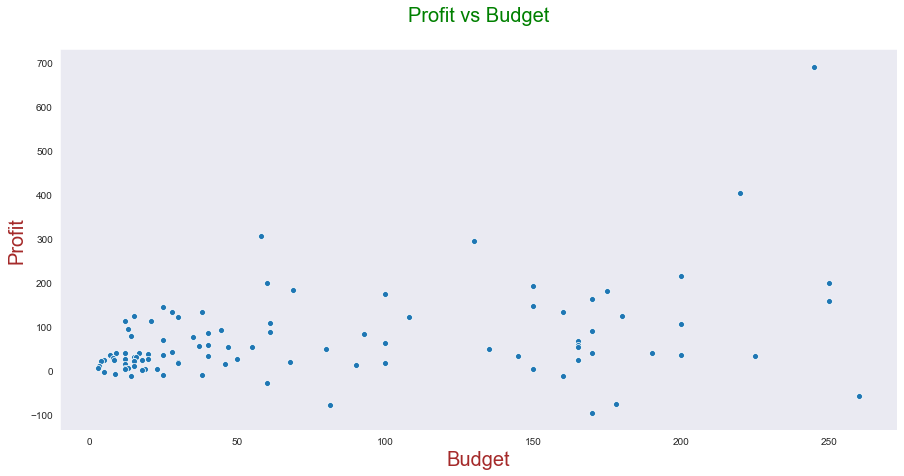

In [18]:
%matplotlib inline
sns.set_style('dark')
plt.figure(figsize = [15,7])
sns.scatterplot(data = movies, x = 'budget', y = 'profit' )
plt.title('Profit vs Budget\n', fontdict = {'fontsize':20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Budget",fontdict = {'fontsize':20, 'fontweight' : 10, 'color' : 'Brown'})
plt.ylabel("Profit",fontdict = {'fontsize':20, 'fontweight' : 10, 'color' : 'Brown'})
plt.show()

The dataset contains the 100 best performing movies from the year 2010 to 2016. However scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [19]:
#Find the movies with negative profit
neg_profit = movies.loc[movies['profit']<0]
#neg_profit
neg_profit.sort_values(by = 'profit', ascending = False)

Title  title_year  budget   Gross  \
99      Tucker and Dale vs Evil        2010     5.0    0.22   
89                        Amour        2012     8.9    0.23   
56                         Rush        2013    38.0   26.90   
66                      Warrior        2011    25.0   13.65   
82                      Flipped        2010    14.0    1.75   
28           X-Men: First Class        2011   160.0  146.41   
46  Scott Pilgrim vs. the World        2010    60.0   31.49   
7                       Tangled        2010   260.0  200.81   
17             Edge of Tomorrow        2014   178.0  100.19   
39            The Little Prince        2015    81.2    1.34   
22                         Hugo        2011   170.0   73.82   

           actor_1_name        actor_2_name            actor_3_name  \
99       Katrina Bowden        Tyler Labine          Chelan Simmons   
89     Isabelle Huppert     Emmanuelle Riva  Jean-Louis Trintignant   
56      Chris Hemsworth        Olivia Wilde    Alexandra Maria Lara   
66            Tom Hardy        Frank Grillo              Kevin Dunn   
82     Madeline Carroll   Rebecca De Mornay             Aidan Quinn   
28    Jennifer Lawrence  Michael Fassbender            Oliver Platt   
46        Anna Kendrick       Kieran Culkin              Ellen Wong   
7          Brad Garrett        Donna Murphy             M.C. Gainey   
17           Tom Cruise         Lara Pulver             Noah Taylor   
39         Jeff Bridges        James Franco           Mackenzie Foy   
22  ChloÃ« Grace Moretz     Christopher Lee            Ray Winstone   

    actor_1_facebook_likes  actor_2_facebook_likes  actor_3_facebook_likes  \
99                     948                   779.0                   440.0   
89                     678                   432.0                   319.0   
56                   26000                 10000.0                   471.0   
66                   27000                   798.0                   581.0   
82                    1000                   872.0                   767.0   
28                   34000                 13000.0                  1000.0   
46                   10000                  1000.0                   719.0   
7                      799                   553.0                   284.0   
17                   10000                   854.0                   509.0   
39                   12000                 11000.0                  6000.0   
22                   17000                 16000.0                  1000.0   

    ...  Votes3044F Votes45A Votes45AM Votes45AF  Votes1000  VotesUS  \
99  ...         7.7      7.5       7.4       7.7        7.1      7.7   
89  ...         7.9      7.9       7.8       8.1        7.2      7.9   
56  ...         7.9      7.8       7.8       7.8        7.1      7.9   
66  ...         8.0      7.7       7.7       7.5        7.1      8.2   
82  ...         7.7      7.4       7.3       7.6        6.4      7.5   
28  ...         7.8      7.6       7.5       7.7        7.3      7.8   
46  ...         7.2      7.1       7.1       7.0        6.6      7.8   
7   ...         8.0      7.7       7.6       7.9        6.9      7.9   
17  ...         7.7      7.8       7.8       7.8        7.5      8.0   
39  ...         7.9      7.5       7.4       7.9        6.6      7.7   
22  ...         7.4      7.5       7.5       7.6        7.4      7.7   

    VotesnUS  content_rating  Country  profit  
99       7.5               R   Canada   -4.78  
89       7.8           PG-13   France   -8.67  
56       8.1               R       UK  -11.10  
66       8.1           PG-13      USA  -11.35  
82       7.7              PG      USA  -12.25  
28       7.7           PG-13      USA  -13.59  
46       7.4           PG-13      USA  -28.51  
7        7.7              PG      USA  -59.19  
17       7.8           PG-13      USA  -77.81  
39       7.7              PG   France  -79.86  
22       7.5              PG      USA  -96.18  

[11 rows x 63 columns]

In [20]:
# we can clearly spot tangled over here released in 2010 where the budget of the movie is 260 million and domestic gross is 200.81 million
# It has highest grossing of all times however the profit is negative

**`Checkpoint 1:`** Can you spot the movie `Tangled` in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

- ### Subtask 2.3: The General Audience and the Critics

You might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, you also have another column `IMDb_rating` which tells you the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

As a part of this subtask, you are required to find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly you will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.
2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, you need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to higher than `8` and store these movies in a new dataframe `UniversalAcclaim`.
    

In [21]:
# Change the scale of MetaCritic
movies.MetaCritic.value_counts()

81.0     8
72.0     7
74.0     7
88.0     5
76.0     5
69.0     4
65.0     4
78.0     4
79.0     4
71.0     4
82.0     3
83.0     3
94.0     3
96.0     3
75.0     3
66.0     2
93.0     2
84.0     2
80.0     2
86.0     2
70.0     2
63.0     2
68.0     2
90.0     2
89.0     1
67.0     1
95.0     1
62.0     1
77.0     1
87.0     1
92.0     1
100.0    1
64.0     1
73.0     1
Name: MetaCritic, dtype: int64

In [22]:
movies.MetaCritic.isnull().sum()

5

In [23]:
movies['MetaCritic'].mode()

0    81.0
dtype: float64

In [24]:
mc_mean = movies.MetaCritic.mean()
mc_mean

78.25263157894737

In [25]:
movies.IMDb_rating.isnull().sum()

0

In [26]:
movies.IMDb_rating.value_counts()

7.8    19
7.6    16
8.1    16
7.7    14
7.9    12
8.0    10
8.2     4
7.5     3
8.4     2
8.3     1
8.6     1
8.8     1
8.5     1
Name: IMDb_rating, dtype: int64

In [27]:
movies.MetaCritic.fillna(mc_mean, inplace = True)
movies.MetaCritic.isnull().sum()

0

In [28]:
movies.MetaCritic.value_counts()

81.000000     8
72.000000     7
74.000000     7
78.252632     5
76.000000     5
88.000000     5
71.000000     4
69.000000     4
65.000000     4
78.000000     4
79.000000     4
75.000000     3
94.000000     3
82.000000     3
96.000000     3
83.000000     3
80.000000     2
93.000000     2
90.000000     2
70.000000     2
63.000000     2
68.000000     2
66.000000     2
84.000000     2
86.000000     2
67.000000     1
62.000000     1
73.000000     1
95.000000     1
89.000000     1
77.000000     1
92.000000     1
87.000000     1
100.000000    1
64.000000     1
Name: MetaCritic, dtype: int64

In [29]:
movies.MetaCritic = movies.MetaCritic.apply(lambda x : round(x))
movies.MetaCritic.value_counts()

78     9
81     8
72     7
74     7
76     5
88     5
69     4
71     4
65     4
79     4
75     3
96     3
82     3
83     3
94     3
84     2
80     2
86     2
66     2
90     2
93     2
68     2
63     2
70     2
67     1
64     1
100    1
73     1
77     1
87     1
89     1
92     1
95     1
62     1
Name: MetaCritic, dtype: int64

In [30]:
movies.MetaCritic = movies.MetaCritic.apply(lambda x : (x/10))
#inp0.MetaCritic.value_counts()

In [31]:
movies.MetaCritic.value_counts()

7.8     9
8.1     8
7.2     7
7.4     7
8.8     5
7.6     5
6.5     4
6.9     4
7.1     4
7.9     4
9.6     3
8.2     3
7.5     3
8.3     3
9.4     3
8.6     2
9.0     2
7.0     2
8.0     2
9.3     2
6.3     2
6.8     2
6.6     2
8.4     2
6.4     1
6.2     1
7.3     1
8.9     1
9.2     1
10.0    1
9.5     1
8.7     1
7.7     1
6.7     1
Name: MetaCritic, dtype: int64

In [32]:
# Find the average ratings
movies['Avg_rating'] = (movies['MetaCritic'] + movies['IMDb_rating'])/2

In [33]:
#Sort in descending order of average rating
movies.head()

Title  title_year  budget   Gross  \
97  Star Wars: Episode VII - The Force Awakens        2015   245.0  936.66   
11                                The Avengers        2012   220.0  623.28   
47                                    Deadpool        2016    58.0  363.02   
32             The Hunger Games: Catching Fire        2013   130.0  424.65   
12                                 Toy Story 3        2010   200.0  414.98   

         actor_1_name       actor_2_name           actor_3_name  \
97        Doug Walker         Rob Walker                      0   
11    Chris Hemsworth  Robert Downey Jr.     Scarlett Johansson   
47      Ryan Reynolds          Ed Skrein         Stefan Kapicic   
32  Jennifer Lawrence    Josh Hutcherson  Sandra Ellis Lafferty   
12          Tom Hanks  John Ratzenberger            Don Rickles   

    actor_1_facebook_likes  actor_2_facebook_likes  actor_3_facebook_likes  \
97                     131                    12.0                     0.0   
11                   26000                 21000.0                 19000.0   
47                   16000                   805.0                   361.0   
32                   34000                 14000.0                   523.0   
12                   15000                  1000.0                   721.0   

    ...  Votes45A Votes45AM Votes45AF Votes1000  VotesUS  VotesnUS  \
97  ...       7.9       7.8       8.2       7.7      8.2       7.9   
11  ...       7.9       7.9       8.1       7.4      8.3       7.9   
47  ...       7.8       7.8       7.9       7.3      8.1       7.9   
32  ...       7.3       7.2       7.9       6.7      7.7       7.4   
12  ...       8.1       8.1       8.1       8.1      8.5       8.3   

    content_rating  Country  profit  Avg_rating  
97           PG-13      USA  691.66        8.10  
11           PG-13      USA  403.28        7.50  
47               R      USA  305.02        7.25  
32           PG-13      USA  294.65        7.60  
12               G      USA  214.98        8.75  

[5 rows x 64 columns]

In [34]:
movies.sort_values(by = 'Avg_rating', ascending = False, inplace = True)

In [35]:
movies.head()

Title  title_year  budget   Gross        actor_1_name  \
94                Boyhood        2014     4.0   25.36      Ellar Coltrane   
69       12 Years a Slave        2013    20.0   56.67  QuvenzhanÃ© Wallis   
18             Inside Out        2015   175.0  356.45         Amy Poehler   
0              La La Land        2016    30.0  151.10        Ryan Gosling   
4   Manchester by the Sea        2016     9.0   47.70       Casey Affleck   

          actor_2_name   actor_3_name  actor_1_facebook_likes  \
94   Lorelei Linklater  Libby Villari                     230   
69       Scoot McNairy   Taran Killam                    2000   
18        Mindy Kaling  Phyllis Smith                    1000   
0           Emma Stone     Amiée Conn                   14000   
4   Michelle Williams   Kyle Chandler                     518   

    actor_2_facebook_likes  actor_3_facebook_likes  ...  Votes45A Votes45AM  \
94                   193.0                   127.0  ...       7.7       7.7   
69                   660.0                   500.0  ...       7.8       7.8   
18                   767.0                   384.0  ...       7.9       7.9   
0                  19000.0                     NaN  ...       7.6       7.6   
4                  71000.0                  3300.0  ...       7.6       7.6   

   Votes45AF Votes1000  VotesUS  VotesnUS  content_rating  Country  profit  \
94       7.7       7.2      8.0       7.9               R      USA   21.36   
69       8.1       7.7      8.3       8.0               R      USA   36.67   
18       7.9       7.6      8.2       8.1              PG      USA  181.45   
0        7.5       7.1      8.3       8.1           PG-13      USA  121.10   
4        7.6       7.1      7.9       7.8               R      USA   38.70   

    Avg_rating  
94        8.95  
69        8.85  
18        8.80  
0         8.75  
4         8.75  

[5 rows x 64 columns]

In [36]:
# Find the movies with metacritic-rating < 0.5 and also with the average rating of >8
UniversalAcclaim = movies[abs(movies['MetaCritic'] - movies['IMDb_rating'])<0.5]

In [37]:
UniversalAcclaim = UniversalAcclaim[(abs(movies['MetaCritic'] - movies['IMDb_rating'])<0.5) & (movies['Avg_rating'] >= 8)].sort_index()

In [38]:
UniversalAcclaim.sort_values(by = 'Avg_rating', ascending = False, inplace = True)

In [39]:
UniversalAcclaim

Title  title_year  budget   Gross  \
95                                    Whiplash        2014     3.3   13.09   
35                            Django Unchained        2012   100.0  162.80   
93                          Dallas Buyers Club        2013     5.0   27.30   
97  Star Wars: Episode VII - The Force Awakens        2015   245.0  936.66   
3                                      Arrival        2016    47.0  100.55   
33                                 The Martian        2015   108.0  228.43   
43                                   Gone Girl        2014    61.0  167.74   

           actor_1_name     actor_2_name       actor_3_name  \
95         J.K. Simmons  Melissa Benoist       Chris Mulkey   
35    Leonardo DiCaprio  Christoph Waltz       Ato Essandoh   
93  Matthew McConaughey  Jennifer Garner       Denis O'Hare   
97          Doug Walker       Rob Walker                  0   
3             Amy Adams    Jeremy Renner    Forest Whitaker   
33           Matt Damon    Donald Glover      Benedict Wong   
43        Patrick Fugit        Sela Ward  Emily Ratajkowski   

    actor_1_facebook_likes  actor_2_facebook_likes  actor_3_facebook_likes  \
95                   24000                   970.0                   535.0   
35                   29000                 11000.0                   265.0   
93                   11000                  3000.0                   896.0   
97                     131                    12.0                     0.0   
3                    35000                  5300.0                     NaN   
33                   13000                   801.0                   372.0   
43                     835                   812.0                   625.0   

    ...  Votes45A Votes45AM Votes45AF Votes1000  VotesUS  VotesnUS  \
95  ...       8.1       8.1       8.2       8.0      8.6       8.4   
35  ...       8.0       8.0       8.1       7.8      8.4       8.4   
93  ...       7.8       7.8       8.0       7.2      8.0       7.9   
97  ...       7.9       7.8       8.2       7.7      8.2       7.9   
3   ...       7.6       7.6       7.7       7.3      8.0       7.9   
33  ...       8.0       7.9       8.2       7.8      8.1       7.9   
43  ...       7.7       7.7       7.7       7.6      8.1       8.1   

    content_rating  Country  profit  Avg_rating  
95               R      USA    9.79        8.65  
35               R      USA   62.80        8.25  
93               R      USA   22.30        8.20  
97           PG-13      USA  691.66        8.10  
3            PG-13      USA   53.55        8.05  
33           PG-13      USA  120.43        8.00  
43               R      USA  106.74        8.00  

[7 rows x 64 columns]

In [40]:
UniversalAcclaim.sort_values(by = 'Avg_rating', ascending = False, inplace = True, ignore_index = True)
UniversalAcclaim

Title  title_year  budget   Gross  \
0                                    Whiplash        2014     3.3   13.09   
1                            Django Unchained        2012   100.0  162.80   
2                          Dallas Buyers Club        2013     5.0   27.30   
3  Star Wars: Episode VII - The Force Awakens        2015   245.0  936.66   
4                                     Arrival        2016    47.0  100.55   
5                                 The Martian        2015   108.0  228.43   
6                                   Gone Girl        2014    61.0  167.74   

          actor_1_name     actor_2_name       actor_3_name  \
0         J.K. Simmons  Melissa Benoist       Chris Mulkey   
1    Leonardo DiCaprio  Christoph Waltz       Ato Essandoh   
2  Matthew McConaughey  Jennifer Garner       Denis O'Hare   
3          Doug Walker       Rob Walker                  0   
4            Amy Adams    Jeremy Renner    Forest Whitaker   
5           Matt Damon    Donald Glover      Benedict Wong   
6        Patrick Fugit        Sela Ward  Emily Ratajkowski   

   actor_1_facebook_likes  actor_2_facebook_likes  actor_3_facebook_likes  \
0                   24000                   970.0                   535.0   
1                   29000                 11000.0                   265.0   
2                   11000                  3000.0                   896.0   
3                     131                    12.0                     0.0   
4                   35000                  5300.0                     NaN   
5                   13000                   801.0                   372.0   
6                     835                   812.0                   625.0   

   ...  Votes45A Votes45AM Votes45AF Votes1000  VotesUS  VotesnUS  \
0  ...       8.1       8.1       8.2       8.0      8.6       8.4   
1  ...       8.0       8.0       8.1       7.8      8.4       8.4   
2  ...       7.8       7.8       8.0       7.2      8.0       7.9   
3  ...       7.9       7.8       8.2       7.7      8.2       7.9   
4  ...       7.6       7.6       7.7       7.3      8.0       7.9   
5  ...       8.0       7.9       8.2       7.8      8.1       7.9   
6  ...       7.7       7.7       7.7       7.6      8.1       8.1   

   content_rating  Country  profit  Avg_rating  
0               R      USA    9.79        8.65  
1               R      USA   62.80        8.25  
2               R      USA   22.30        8.20  
3           PG-13      USA  691.66        8.10  
4           PG-13      USA   53.55        8.05  
5           PG-13      USA  120.43        8.00  
6               R      USA  106.74        8.00  

[7 rows x 64 columns]

**`Checkpoint 2:`** Can you spot a `Star Wars` movie in your final dataset?
- Yes I can clearly spot Star Wars: Episode VII - The Force Awakens in my final dataset
- We can clearly see that the final dataset values are in descending order
- With rating equal to or higher than 8

- ### Subtask 2.4: Find the Most Popular Trios - I

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [41]:
# Write your code here
movies.actor_1_facebook_likes.isnull().sum()


0

In [42]:
movies.actor_2_facebook_likes.isnull().sum()

1

In [43]:
x_actor = movies.actor_2_facebook_likes.mean()

In [44]:
x_actor

7377.30303030303

In [45]:
movies.actor_2_facebook_likes.fillna(x_actor, inplace = True)

In [46]:
movies.actor_2_facebook_likes.isnull().sum()

0

In [47]:
movies.actor_3_facebook_likes.isnull().sum()

2

In [48]:
y_actor = movies.actor_3_facebook_likes.mean()
y_actor

3002.1530612244896

In [49]:
movies.actor_3_facebook_likes.fillna(y_actor, inplace = True)

In [50]:
movies.actor_3_facebook_likes.isnull().sum()

0

In [51]:
movies['Total_Likes'] = movies['actor_1_facebook_likes'] + movies['actor_2_facebook_likes'] + movies['actor_3_facebook_likes']

In [52]:
movies.head()

Title  title_year  budget   Gross        actor_1_name  \
94                Boyhood        2014     4.0   25.36      Ellar Coltrane   
69       12 Years a Slave        2013    20.0   56.67  QuvenzhanÃ© Wallis   
18             Inside Out        2015   175.0  356.45         Amy Poehler   
0              La La Land        2016    30.0  151.10        Ryan Gosling   
4   Manchester by the Sea        2016     9.0   47.70       Casey Affleck   

          actor_2_name   actor_3_name  actor_1_facebook_likes  \
94   Lorelei Linklater  Libby Villari                     230   
69       Scoot McNairy   Taran Killam                    2000   
18        Mindy Kaling  Phyllis Smith                    1000   
0           Emma Stone     Amiée Conn                   14000   
4   Michelle Williams   Kyle Chandler                     518   

    actor_2_facebook_likes  actor_3_facebook_likes  ...  Votes45AM Votes45AF  \
94                   193.0              127.000000  ...        7.7       7.7   
69                   660.0              500.000000  ...        7.8       8.1   
18                   767.0              384.000000  ...        7.9       7.9   
0                  19000.0             3002.153061  ...        7.6       7.5   
4                  71000.0             3300.000000  ...        7.6       7.6   

   Votes1000 VotesUS  VotesnUS  content_rating  Country  profit  Avg_rating  \
94       7.2     8.0       7.9               R      USA   21.36        8.95   
69       7.7     8.3       8.0               R      USA   36.67        8.85   
18       7.6     8.2       8.1              PG      USA  181.45        8.80   
0        7.1     8.3       8.1           PG-13      USA  121.10        8.75   
4        7.1     7.9       7.8               R      USA   38.70        8.75   

     Total_Likes  
94    550.000000  
69   3160.000000  
18   2151.000000  
0   36002.153061  
4   74818.000000  

[5 rows x 65 columns]

In [53]:
top_5_popular_trios = movies.sort_values(by = 'Total_Likes', ascending = False, ignore_index = True).loc[0:4,:]

In [54]:
top_5_popular_trios

Title  title_year  budget   Gross       actor_1_name  \
0                        Lion        2016    12.0   51.74          Dev Patel   
1                   Inception        2010   160.0  292.57  Leonardo DiCaprio   
2  X-Men: Days of Future Past        2014   200.0  233.91  Jennifer Lawrence   
3       Manchester by the Sea        2016     9.0   47.70      Casey Affleck   
4       The Dark Knight Rises        2012   250.0  448.13          Tom Hardy   

         actor_2_name          actor_3_name  actor_1_facebook_likes  \
0       Nicole Kidman           Rooney Mara                   33000   
1           Tom Hardy  Joseph Gordon-Levitt                   29000   
2      Peter Dinklage          Hugh Jackman                   34000   
3  Michelle Williams          Kyle Chandler                     518   
4      Christian Bale  Joseph Gordon-Levitt                   27000   

   actor_2_facebook_likes  actor_3_facebook_likes  ...  Votes45AM Votes45AF  \
0                 96000.0                  9800.0  ...        7.9       8.4   
1                 27000.0                 23000.0  ...        8.1       8.0   
2                 22000.0                 20000.0  ...        7.7       7.9   
3                 71000.0                  3300.0  ...        7.6       7.6   
4                 23000.0                 23000.0  ...        7.9       7.9   

  Votes1000 VotesUS  VotesnUS  content_rating    Country  profit  Avg_rating  \
0       7.1     8.1       8.0           PG-13  Australia   39.74        7.50   
1       8.2     8.7       8.8           PG-13        USA  132.57        8.10   
2       7.4     8.1       7.9           PG-13        USA   33.91        7.70   
3       7.1     7.9       7.8               R        USA   38.70        8.75   
4       7.8     8.4       8.4           PG-13        USA  198.13        8.10   

   Total_Likes  
0     138800.0  
1      79000.0  
2      76000.0  
3      74818.0  
4      73000.0  

[5 rows x 65 columns]

In [55]:
top_5_popular_trios = movies.sort_values(by = 'Total_Likes', ascending = False,ignore_index = True).loc[0:4,['actor_1_name','actor_2_name','actor_3_name']].values.tolist()

In [56]:
top_5_popular_trios

[['Dev Patel', 'Nicole Kidman', 'Rooney Mara'],
 ['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Casey Affleck', 'Michelle Williams ', 'Kyle Chandler'],
 ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt']]

- ### Subtask 2.5: Find the Most Popular Trios - II

In the previous subtask you found the popular trio based on the total number of facebook likes. Let's add a small condition to it and make sure that all three actors are popular. The condition is **none of the three actors' Facebook likes should be less than half of the other two**. For example, the following is a valid combo:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 50000

But the below one is not:
- actor_1_facebook_likes: 70000
- actor_2_facebook_likes: 40000
- actor_3_facebook_likes: 30000

since in this case, `actor_3_facebook_likes` is 30000, which is less than half of `actor_1_facebook_likes`.

Having this condition ensures that you aren't getting any unpopular actor in your trio (since the total likes calculated in the previous question doesn't tell anything about the individual popularities of each actor in the trio.).

You can do a manual inspection of the top 5 popular trios you have found in the previous subtask and check how many of those trios satisfy this condition. Also, which is the most popular trio after applying the condition above?

**Write your answers below.**

- **`No. of trios that satisfy the above condition:`**

- **`Most popular trio after applying the condition:`**

**`Optional:`** Even though you are finding this out by a natural inspection of the dataframe, can you also achieve this through some *if-else* statements to incorporate this. You can try this out on your own time after you are done with the assignment.

# Your answer here (optional)
- ['Dev Patel', 'Nicole Kidman', 'Rooney Mara'] : Invalid combo
- ['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'] : Valid combo
- ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'] : Valid combo
- ['Casey Affleck', 'Michelle Williams ', 'Kyle Chandler'] : Invalid combo
- ['Tom Hardy', 'Christian Bale', 'Joseph Gordon-Levitt'] : Valid combo


- ### Subtask 2.6: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

In [57]:
# Runtime histogram/density plot
movies.Runtime.value_counts()

124    10
108     5
100     4
120     3
126     3
146     3
118     3
134     3
121     3
132     3
123     3
133     2
102     2
136     2
143     2
147     2
158     2
165     2
169     2
130     2
94      2
128     2
117     2
109     2
116     2
115     2
103     1
113     1
125     1
131     1
122     1
119     1
137     1
138     1
140     1
142     1
144     1
114     1
148     1
99      1
149     1
153     1
156     1
112     1
161     1
164     1
110     1
180     1
91      1
107     1
95      1
98      1
127     1
Name: Runtime, dtype: int64

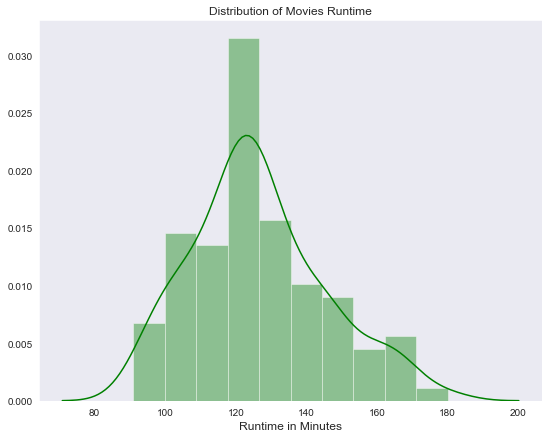

In [58]:
plt.figure(figsize = [9,7])
sns.set_style("dark")
res = sns.distplot(movies.Runtime, bins = 10, color = 'g')
plt.title("Distribution of Movies Runtime", fontsize = 12)
res.set_xlabel("Runtime in Minutes", fontsize = 12)
plt.show()


In [59]:
# We can clearly see that most of the movies seems to be 120 minutes as depicted in the above figure

**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 2.7: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [60]:
# Write your code here
# filtering all the r-rated movies
filter_Rrated = movies[movies['content_rating']=='R']
filter_Rrated

Title  title_year  budget  \
94                                          Boyhood        2014     4.0   
69                                 12 Years a Slave        2013    20.0   
4                             Manchester by the Sea        2016     9.0   
70                                        Spotlight        2015    20.0   
95                                         Whiplash        2014     3.3   
96                                  Before Midnight        2013     3.0   
29                               Mad Max: Fury Road        2015   150.0   
67                                              Her        2013    23.0   
65                         The Grand Budapest Hotel        2014    25.0   
76                                The King's Speech        2010    15.0   
72  Birdman or (The Unexpected Virtue of Ignorance)        2014    18.0   
5                                Hell or High Water        2016    12.0   
35                                 Django Unchained        2012   100.0   
93                               Dallas Buyers Club        2013     5.0   
51                                             Argo        2012    44.5   
87                                         Nebraska        2013    12.0   
43                                        Gone Girl        2014    61.0   
83                                       Black Swan        2010    13.0   
68                          Silver Linings Playbook        2012    21.0   
62                                    The Big Short        2015    28.0   
60                                          Sicario        2015    30.0   
73                                        127 Hours        2010    18.0   
64                                      The Fighter        2010    25.0   
36                          The Wolf of Wall Street        2013   100.0   
31                                     The Revenant        2015   135.0   
56                                             Rush        2013    38.0   
88                                       About Time        2013    12.0   
79                                            Drive        2011    15.0   
50                                        Prisoners        2013    46.0   
90                                     Nightcrawler        2014     8.5   
80                                       Ex Machina        2014    15.0   
52                                    Lone Survivor        2013    40.0   
61                           Straight Outta Compton        2015    28.0   
57                                         The Town        2010    37.0   
91                                            50/50        2011     8.0   
38                  The Girl with the Dragon Tattoo        2011    90.0   
47                                         Deadpool        2016    58.0   
92                                     End of Watch        2012     7.0   
40                                   Shutter Island        2010    80.0   
59                                         Kick-Ass        2010    30.0   
99                          Tucker and Dale vs Evil        2010     5.0   
42                                             Fury        2014    68.0   

     Gross              actor_1_name         actor_2_name  \
94   25.36            Ellar Coltrane    Lorelei Linklater   
69   56.67        QuvenzhanÃ© Wallis        Scoot McNairy   
4    47.70             Casey Affleck   Michelle Williams    
70   44.99              Billy Crudup       Jamey Sheridan   
95   13.09              J.K. Simmons      Melissa Benoist   
96    8.11  Seamus Davey-Fitzpatrick         Ariane Labed   
29  153.63                 Tom Hardy      Charlize Theron   
67   25.56        Scarlett Johansson        Brian Johnson   
65   59.07               Bill Murray        Tom Wilkinson   
76  138.80               Colin Firth        Jennifer Ehle   
72   42.34                Emma Stone          Naomi Watts   
5    27.01                Chris Pine         Jeff Bridges   
35  162.80         Leonardo

In [61]:
filter_Rrated.shape

(42, 65)

In [62]:
PopularR = filter_Rrated.sort_values(by = 'CVotesU18', ascending = False,ignore_index = True)[0:10]

In [63]:
PopularR

Title  title_year  budget  \
0                                         Deadpool        2016    58.0   
1                          The Wolf of Wall Street        2013   100.0   
2                                 Django Unchained        2012   100.0   
3                               Mad Max: Fury Road        2015   150.0   
4                                         Whiplash        2014     3.3   
5                                     The Revenant        2015   135.0   
6                                   Shutter Island        2010    80.0   
7                                        Gone Girl        2014    61.0   
8                         The Grand Budapest Hotel        2014    25.0   
9  Birdman or (The Unexpected Virtue of Ignorance)        2014    18.0   

    Gross       actor_1_name         actor_2_name       actor_3_name  \
0  363.02      Ryan Reynolds            Ed Skrein     Stefan Kapicic   
1  116.87  Leonardo DiCaprio  Matthew McConaughey        Jon Favreau   
2  162.80  Leonardo DiCaprio      Christoph Waltz       Ato Essandoh   
3  153.63          Tom Hardy      Charlize Theron       ZoÃ« Kravitz   
4   13.09       J.K. Simmons      Melissa Benoist       Chris Mulkey   
5  183.64  Leonardo DiCaprio            Tom Hardy         Lukas Haas   
6  127.97  Leonardo DiCaprio        Joseph Sikora     Nellie Sciutto   
7  167.74      Patrick Fugit            Sela Ward  Emily Ratajkowski   
8   59.07        Bill Murray        Tom Wilkinson  F. Murray Abraham   
9   42.34         Emma Stone          Naomi Watts      Merritt Wever   

   actor_1_facebook_likes  actor_2_facebook_likes  actor_3_facebook_likes  \
0                   16000                   805.0                   361.0   
1                   29000                 11000.0                  4000.0   
2                   29000                 11000.0                   265.0   
3                   27000                  9000.0                   943.0   
4                   24000                   970.0                   535.0   
5                   29000                 27000.0                   733.0   
6                   29000                   223.0                   163.0   
7                     835                   812.0                   625.0   
8                   13000                  1000.0                   670.0   
9                   15000                  6000.0                   529.0   

   ...  Votes45AM Votes45AF Votes1000 VotesUS  VotesnUS  content_rating  \
0  ...        7.8       7.9       7.3     8.1       7.9               R   
1  ...        7.6       7.5       7.8     8.1       8.1               R   
2  ...        8.0       8.1       7.8     8.4       8.4               R   
3  ...        7.5       7.2       8.0     8.2       8.0               R   
4  ...        8.1       8.2       8.0     8.6       8.4               R   
5  ...        7.8       7.8       7.6     8.1       7.9               R   
6  ...        7.4       7.6       7.6     7.8       8.1               R   
7  ...        7.7       7.7       7.6     8.1       8.1               R   
8  ...        7.8       7.9       7.7     8.1       8.0               R   
9  ...        7.3       7.0       7.1     7.9       7.7               R   

     Country  profit  Avg_rating  Total_Likes  
0        USA  305.02        7.25      17166.0  
1        USA   16.87        7.85      44000.0  
2        USA   62.80        8.25      40265.0  
3  Australia    3.63        8.55      36943.0  
4        USA    9.79        8.65      25505.0  
5        USA   48.64        7.80      56733.0  
6        USA   47.97        7.20      29386.0  
7        USA  106.74        8.00       2272.0  
8        USA   34.07        8.45      14670.0  
9        USA   24.34        8.30      21529.0  

[10 rows x 65 columns]

**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?

In [64]:
# Yes we can clearly see even deadpool is R-rated , it has become one of the most preferable choice for kids under 18

## Task 3 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 3.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns. 
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [65]:
# Create the dataframe df_by_genre
movies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 94 to 44
Data columns (total 65 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    float64
 3   Gross                   100 non-null    float64
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  100 non-null    float64
 9   actor_3_facebook_likes  100 non-null    float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              100 non-null    fl

In [66]:
# since there are nonull values in CVotes and Votes Section we can move ahead with the calculation
# If we start concatenating all columns it will be tedious process
# the best approch would be to append all the columns in a dictionary
# then finally create a dataframe df_by_genre

res_1 = []
for values in movies.columns:
    if values.startswith('CV') | values.startswith('V') | values.startswith('ge'):
        res_1.append(values)
df_by_genre = movies.loc[:,res_1]

In [67]:
df_by_genre

genre_1    genre_2  genre_3  CVotes10  CVotes09  CVotes08  CVotes07  \
94      Drama        NaN      NaN     49673     62055     76838     52238   
69  Biography      Drama  History     75556    126223    161460     83070   
18  Animation  Adventure   Comedy     87509    113244    119801     67153   
0      Comedy      Drama    Music     74245     71191     64640     38831   
4       Drama        NaN      NaN     18191     33532     46596     29626   
..        ...        ...      ...       ...       ...       ...       ...   
28     Action  Adventure   Sci-Fi     64428     96219    200144    129352   
98  Adventure     Family  Fantasy     68937     54947    102488     80465   
99     Comedy     Horror      NaN     16572     19818     44460     35863   
42     Action      Drama      War     36753     54703    111271     82505   
44      Drama    Musical  Romance     54268     47750     63323     45160   

    CVotes06  CVotes05  CVotes04  ...  Votes1829F  Votes3044  Votes3044M  \
94     23789     10431      4906  ...         7.8        7.8         7.8   
69     27231      9603      4021  ...         8.2        8.0         7.9   
18     24210      8542      3349  ...         8.3        8.1         8.1   
0      17377      8044      3998  ...         8.2        7.9         7.9   
4      11879      4539      1976  ...         7.8        7.7         7.7   
..       ...       ...       ...  ...         ...        ...         ...   
28     41945     12861      4799  ...         8.0        7.7         7.6   
98     31205     11792      4808  ...         8.3        7.4         7.3   
99     13456      4588      1684  ...         7.6        7.5         7.5   
42     30231     10553      4303  ...         7.7        7.4         7.4   
44     22393     10744      5551  ...         8.0        7.3         7.2   

    Votes3044F  Votes45A  Votes45AM  Votes45AF  Votes1000  VotesUS  VotesnUS  
94         7.6       7.7        7.7        7.7        7.2      8.0       7.9  
69         8.0       7.8        7.8        8.1        7.7      8.3       8.0  
18         8.1       7.9        7.9        7.9        7.6      8.2       8.1  
0          7.8       7.6        7.6        7.5        7.1      8.3       8.1  
4          7.7       7.6        7.6        7.6        7.1      7.9       7.8  
..         ...       ...        ...        ...        ...      ...       ...  
28         7.8       7.6        7.5        7.7        7.3      7.8       7.7  
98         8.1       7.4        7.3        8.0        6.7      7.9       7.5  
99         7.7       7.5        7.4        7.7        7.1      7.7       7.5  
42         7.4       7.4        7.4        7.4        6.8      7.6       7.5  
44         7.6       7.4        7.3        7.7        6.6      7.6       7.5  

[100 rows x 47 columns]

In [68]:
# Create a column cnt and initialize it to 1
df_by_genre['cnt'] = 1

In [69]:
df_by_genre.head()

genre_1    genre_2  genre_3  CVotes10  CVotes09  CVotes08  CVotes07  \
94      Drama        NaN      NaN     49673     62055     76838     52238   
69  Biography      Drama  History     75556    126223    161460     83070   
18  Animation  Adventure   Comedy     87509    113244    119801     67153   
0      Comedy      Drama    Music     74245     71191     64640     38831   
4       Drama        NaN      NaN     18191     33532     46596     29626   

    CVotes06  CVotes05  CVotes04  ...  Votes3044  Votes3044M  Votes3044F  \
94     23789     10431      4906  ...        7.8         7.8         7.6   
69     27231      9603      4021  ...        8.0         7.9         8.0   
18     24210      8542      3349  ...        8.1         8.1         8.1   
0      17377      8044      3998  ...        7.9         7.9         7.8   
4      11879      4539      1976  ...        7.7         7.7         7.7   

    Votes45A  Votes45AM  Votes45AF  Votes1000  VotesUS  VotesnUS  cnt  
94       7.7        7.7        7.7        7.2      8.0       7.9    1  
69       7.8        7.8        8.1        7.7      8.3       8.0    1  
18       7.9        7.9        7.9        7.6      8.2       8.1    1  
0        7.6        7.6        7.5        7.1      8.3       8.1    1  
4        7.6        7.6        7.6        7.1      7.9       7.8    1  

[5 rows x 48 columns]

In [70]:
# Group the movies by individual genres
df_by_g1 = df_by_genre.groupby('genre_1').sum()
df_by_g2 = df_by_genre.groupby('genre_2').sum()
df_by_g3 = df_by_genre.groupby('genre_3').sum()

In [71]:
df_by_g1.head()

CVotes10  CVotes09  CVotes08  CVotes07  CVotes06  CVotes05  \
genre_1                                                                 
Action      2928407   3261919   4247693   2662020    986774    364234   
Adventure   1058779   1179818   1560541    966275    365486    136985   
Animation    681562    798227   1153214    722782    251076     83069   
Biography    666831   1088430   1654704    962977    306247    100005   
Comedy       371217    496905    770395    518566    205434     81933   

           CVotes04  CVotes03  CVotes02  CVotes01  ...  Votes3044  Votes3044M  \
genre_1                                            ...                          
Action       156150     89483     61975    162426  ...      209.1       208.8   
Adventure     58559     33174     22018     48100  ...       92.7        92.6   
Animation     30718     15733     10026     25193  ...       85.4        84.9   
Biography     38874     21536     15365     37469  ...      100.8       100.7   
Comedy        35788     20965     15286     33241  ...       68.6        68.7   

           Votes3044F  Votes45A  Votes45AM  Votes45AF  Votes1000  VotesUS  \
genre_1                                                                     
Action          210.0     206.5      206.0      209.0      197.2    215.8   
Adventure        93.5      92.0       91.6       93.8       88.9     95.3   
Animation        87.8      84.5       84.1       86.7       80.0     87.6   
Biography       101.3     100.5      100.0      102.9       94.7    103.3   
Comedy           68.9      67.7       67.5       68.7       62.7     70.9   

           VotesnUS  cnt  
genre_1                   
Action        209.5   27  
Adventure      93.5   12  
Animation      86.1   11  
Biography     101.5   13  
Comedy         69.4    9  

[5 rows x 45 columns]

In [72]:
df_by_g2.head()

CVotes10  CVotes09  CVotes08  CVotes07  CVotes06  CVotes05  \
genre_2                                                                 
Action       238060    285510    430062    260106     88580     29250   
Adventure   2297820   2548864   3271725   2055600    758009    272735   
Biography    185172    313178    576374    370003    119348     38643   
Comedy       428995    624720    854162    512668    193916     76752   
Crime         19576     40247     85359     64633     24920      8548   

           CVotes04  CVotes03  CVotes02  CVotes01  ...  Votes3044  Votes3044M  \
genre_2                                            ...                          
Action        10820      5521      3598      8821  ...       30.9        30.7   
Adventure    113691     64623     44121    116937  ...      171.0       170.4   
Biography     14844      7974      5248     13828  ...       38.3        38.2   
Comedy        35193     20995     14798     30509  ...       54.0        54.1   
Crime          3261      1669       970      1689  ...        7.5         7.6   

           Votes3044F  Votes45A  Votes45AM  Votes45AF  Votes1000  VotesUS  \
genre_2                                                                     
Action           31.8      30.5       30.4       31.4       29.0     31.8   
Adventure       173.9     169.2      168.4      172.8      162.7    176.4   
Biography        38.5      38.0       37.9       38.8       35.4     39.4   
Comedy           53.4      53.0       53.1       53.1       51.0     55.5   
Crime             7.2       7.6        7.6        7.4        7.2      7.8   

           VotesnUS  cnt  
genre_2                   
Action         31.1    4  
Adventure     171.6   22  
Biography      38.4    5  
Comedy         54.3    7  
Crime           7.6    1  

[5 rows x 45 columns]

In [73]:
df_by_g3.head()

CVotes10  CVotes09  CVotes08  CVotes07  CVotes06  CVotes05  \
genre_3                                                                 
Adventure    238060    285510    430062    260106     88580     29250   
Comedy       583404    653362    882294    559835    200937     68167   
Crime        171660    236650    250667    129164     46715     18682   
Drama        400221    680085   1167327    748493    258717     88338   
Family        29228     40728     77893     62936     27932     11179   

           CVotes04  CVotes03  CVotes02  CVotes01  ...  Votes3044  Votes3044M  \
genre_3                                            ...                          
Adventure     10820      5521      3598      8821  ...       30.9        30.7   
Comedy        26488     14258      9307     24617  ...       54.8        54.6   
Crime          8674      5854      4258      9689  ...        8.0         8.1   
Drama         35439     19075     12475     26948  ...       91.8        91.7   
Family         4664      2674      1700      3023  ...        7.4         7.4   

           Votes3044F  Votes45A  Votes45AM  Votes45AF  Votes1000  VotesUS  \
genre_3                                                                     
Adventure        31.8      30.5       30.4       31.4       29.0     31.8   
Comedy           56.0      54.3       54.1       55.3       51.7     56.2   
Crime             7.7       7.6        7.6        7.5        7.8      8.1   
Drama            92.0      91.2       91.0       92.7       86.1     94.5   
Family            7.4       7.5        7.5        7.6        7.4      7.7   

           VotesnUS  cnt  
genre_3                   
Adventure      31.1    4  
Comedy         55.2    7  
Crime           8.1    1  
Drama          92.3   12  
Family          7.5    1  

[5 rows x 45 columns]

In [74]:
# Add the grouped data frames and store it in a new data frame
# The add function below is derived from the above link provided
# when the addend is omitted, instead of adding something that is not-a-number, we just don't add anything at all.
# So we use fill_value = 0
d1 = df_by_g1.add(df_by_g2,fill_value = 0)
df_add = d1.add(df_by_g3, fill_value = 0)

In [75]:
df_add.head()

CVotes10   CVotes09   CVotes08   CVotes07   CVotes06  CVotes05  \
Action     3166467.0  3547429.0  4677755.0  2922126.0  1075354.0  393484.0   
Adventure  3594659.0  4014192.0  5262328.0  3281981.0  1212075.0  438970.0   
Animation   681562.0   798227.0  1153214.0   722782.0   251076.0   83069.0   
Biography   852003.0  1401608.0  2231078.0  1332980.0   425595.0  138648.0   
Comedy     1383616.0  1774987.0  2506851.0  1591069.0   600287.0  226852.0   

           CVotes04  CVotes03  CVotes02  CVotes01  ...  Votes3044  Votes3044M  \
Action     166970.0   95004.0   65573.0  171247.0  ...      240.0       239.5   
Adventure  183070.0  103318.0   69737.0  173858.0  ...      294.6       293.7   
Animation   30718.0   15733.0   10026.0   25193.0  ...       85.4        84.9   
Biography   53718.0   29510.0   20613.0   51297.0  ...      139.1       138.9   
Comedy      97469.0   56218.0   39391.0   88367.0  ...      177.4       177.4   

           Votes3044F  Votes45A  Votes45AM  Votes45AF  Votes1000  VotesUS  \
Action          241.8     237.0      236.4      240.4      226.2    247.6   
Adventure       299.2     291.7      290.4      298.0      280.6    303.5   
Animation        87.8      84.5       84.1       86.7       80.0     87.6   
Biography       139.8     138.5      137.9      141.7      130.1    142.7   
Comedy          178.3     175.0      174.7      177.1      165.4    182.6   

           VotesnUS   cnt  
Action        240.6  31.0  
Adventure     296.2  38.0  
Animation      86.1  11.0  
Biography     139.9  18.0  
Comedy        178.9  23.0  

[5 rows x 45 columns]

In [76]:
genre_top10 = df_add[df_add['cnt'] >= 10]
genre_top10

CVotes10   CVotes09   CVotes08   CVotes07   CVotes06  CVotes05  \
Action     3166467.0  3547429.0  4677755.0  2922126.0  1075354.0  393484.0   
Adventure  3594659.0  4014192.0  5262328.0  3281981.0  1212075.0  438970.0   
Animation   681562.0   798227.0  1153214.0   722782.0   251076.0   83069.0   
Biography   852003.0  1401608.0  2231078.0  1332980.0   425595.0  138648.0   
Comedy     1383616.0  1774987.0  2506851.0  1591069.0   600287.0  226852.0   
Crime       574526.0   967118.0  1419495.0   821390.0   278391.0   98690.0   
Drama      3404438.0  4935375.0  7107053.0  4319700.0  1529356.0  552312.0   
Romance     549959.0   689492.0  1069280.0   712841.0   281289.0  110901.0   
Sci-Fi     2325284.0  2530855.0  3002994.0  1802098.0   671811.0  254175.0   
Thriller   1081701.0  1465491.0  1993378.0  1175799.0   416046.0  149953.0   

           CVotes04  CVotes03  CVotes02  CVotes01  ...  Votes3044  Votes3044M  \
Action     166970.0   95004.0   65573.0  171247.0  ...      240.0       239.5   
Adventure  183070.0  103318.0   69737.0  173858.0  ...      294.6       293.7   
Animation   30718.0   15733.0   10026.0   25193.0  ...       85.4        84.9   
Biography   53718.0   29510.0   20613.0   51297.0  ...      139.1       138.9   
Comedy      97469.0   56218.0   39391.0   88367.0  ...      177.4       177.4   
Crime       42271.0   24713.0   16985.0   37217.0  ...       84.9        85.4   
Drama      235475.0  135126.0   94185.0  211308.0  ...      501.3       501.1   
Romance     48913.0   27698.0   19200.0   40075.0  ...       98.9        98.9   
Sci-Fi     111925.0   65904.0   46171.0  114435.0  ...      133.6       133.5   
Thriller    65281.0   37940.0   25767.0   57630.0  ...      100.6       100.7   

           Votes3044F  Votes45A  Votes45AM  Votes45AF  Votes1000  VotesUS  \
Action          241.8     237.0      236.4      240.4      226.2    247.6   
Adventure       299.2     291.7      290.4      298.0      280.6    303.5   
Animation        87.8      84.5       84.1       86.7       80.0     87.6   
Biography       139.8     138.5      137.9      141.7      130.1    142.7   
Comedy          178.3     175.0      174.7      177.1      165.4    182.6   
Crime            83.7      83.9       83.8       84.5       81.3     87.8   
Drama           501.8     496.8      495.3      503.2      469.5    515.9   
Romance          99.6      97.8       97.5       98.9       89.9    101.8   
Sci-Fi          133.2     131.1      130.8      131.5      127.9    137.5   
Thriller        100.1      99.6       99.3      100.7       96.2    103.1   

           VotesnUS   cnt  
Action        240.6  31.0  
Adventure     296.2  38.0  
Animation      86.1  11.0  
Biography     139.9  18.0  
Comedy        178.9  23.0  
Crime          85.8  11.0  
Drama         506.0  65.0  
Romance       100.1  13.0  
Sci-Fi        134.0  17.0  
Thriller      101.5  13.0  

[10 rows x 45 columns]

In [77]:
# Extract genres with atleast 10 occurences
genre_top10.cnt

Action       31.0
Adventure    38.0
Animation    11.0
Biography    18.0
Comedy       23.0
Crime        11.0
Drama        65.0
Romance      13.0
Sci-Fi       17.0
Thriller     13.0
Name: cnt, dtype: float64

In [78]:
count_cnt = genre_top10.cnt

In [79]:
# Take the mean for every column by dividing with cnt 
# Initially adding was done according to the index
# Division will also be according to the index
genre_top10 = genre_top10.div(genre_top10['cnt'], axis = 'index')

In [80]:
# Rounding off the columns of Votes to two decimals
genre_top10 = genre_top10.apply(lambda x : round(x,2), axis = 0)

In [81]:
genre_top10

CVotes10   CVotes09   CVotes08   CVotes07  CVotes06  CVotes05  \
Action     102144.10  114433.19  150895.32   94262.13  34688.84  12693.03   
Adventure   94596.29  105636.63  138482.32   86367.92  31896.71  11551.84   
Animation   61960.18   72566.09  104837.64   65707.45  22825.09   7551.73   
Biography   47333.50   77867.11  123948.78   74054.44  23644.17   7702.67   
Comedy      60157.22   77173.35  108993.52   69176.91  26099.43   9863.13   
Crime       52229.64   87919.82  129045.00   74671.82  25308.27   8971.82   
Drama       52375.97   75928.85  109339.28   66456.92  23528.55   8497.11   
Romance     42304.54   53037.85   82252.31   54833.92  21637.62   8530.85   
Sci-Fi     136781.41  148873.82  176646.71  106005.76  39518.29  14951.47   
Thriller    83207.77  112730.08  153336.77   90446.08  32003.54  11534.85   

           CVotes04  CVotes03  CVotes02  CVotes01  ...  Votes3044  Votes3044M  \
Action      5386.13   3064.65   2115.26   5524.10  ...       7.74        7.73   
Adventure   4817.63   2718.89   1835.18   4575.21  ...       7.75        7.73   
Animation   2792.55   1430.27    911.45   2290.27  ...       7.76        7.72   
Biography   2984.33   1639.44   1145.17   2849.83  ...       7.73        7.72   
Comedy      4237.78   2444.26   1712.65   3842.04  ...       7.71        7.71   
Crime       3842.82   2246.64   1544.09   3383.36  ...       7.72        7.76   
Drama       3622.69   2078.86   1449.00   3250.89  ...       7.71        7.71   
Romance     3762.54   2130.62   1476.92   3082.69  ...       7.61        7.61   
Sci-Fi      6583.82   3876.71   2715.94   6731.47  ...       7.86        7.85   
Thriller    5021.62   2918.46   1982.08   4433.08  ...       7.74        7.75   

           Votes3044F  Votes45A  Votes45AM  Votes45AF  Votes1000  VotesUS  \
Action           7.80      7.65       7.63       7.75       7.30     7.99   
Adventure        7.87      7.68       7.64       7.84       7.38     7.99   
Animation        7.98      7.68       7.65       7.88       7.27     7.96   
Biography        7.77      7.69       7.66       7.87       7.23     7.93   
Comedy           7.75      7.61       7.60       7.70       7.19     7.94   
Crime            7.61      7.63       7.62       7.68       7.39     7.98   
Drama            7.72      7.64       7.62       7.74       7.22     7.94   
Romance          7.66      7.52       7.50       7.61       6.92     7.83   
Sci-Fi           7.84      7.71       7.69       7.74       7.52     8.09   
Thriller         7.70      7.66       7.64       7.75       7.40     7.93   

           VotesnUS  cnt  
Action         7.76  1.0  
Adventure      7.79  1.0  
Animation      7.83  1.0  
Biography      7.77  1.0  
Comedy         7.78  1.0  
Crime          7.80  1.0  
Drama          7.78  1.0  
Romance        7.70  1.0  
Sci-Fi         7.88  1.0  
Thriller       7.81  1.0  

[10 rows x 45 columns]

In [82]:
# Converting CVotes to int type
res_3 = []
for col in genre_top10.columns:
    if col.startswith('CVote'):
        res_3.append(col)
genre_top10[res_3] = genre_top10[res_3].astype('int')

In [83]:
genre_top10

CVotes10  CVotes09  CVotes08  CVotes07  CVotes06  CVotes05  \
Action       102144    114433    150895     94262     34688     12693   
Adventure     94596    105636    138482     86367     31896     11551   
Animation     61960     72566    104837     65707     22825      7551   
Biography     47333     77867    123948     74054     23644      7702   
Comedy        60157     77173    108993     69176     26099      9863   
Crime         52229     87919    129045     74671     25308      8971   
Drama         52375     75928    109339     66456     23528      8497   
Romance       42304     53037     82252     54833     21637      8530   
Sci-Fi       136781    148873    176646    106005     39518     14951   
Thriller      83207    112730    153336     90446     32003     11534   

           CVotes04  CVotes03  CVotes02  CVotes01  ...  Votes3044  Votes3044M  \
Action         5386      3064      2115      5524  ...       7.74        7.73   
Adventure      4817      2718      1835      4575  ...       7.75        7.73   
Animation      2792      1430       911      2290  ...       7.76        7.72   
Biography      2984      1639      1145      2849  ...       7.73        7.72   
Comedy         4237      2444      1712      3842  ...       7.71        7.71   
Crime          3842      2246      1544      3383  ...       7.72        7.76   
Drama          3622      2078      1449      3250  ...       7.71        7.71   
Romance        3762      2130      1476      3082  ...       7.61        7.61   
Sci-Fi         6583      3876      2715      6731  ...       7.86        7.85   
Thriller       5021      2918      1982      4433  ...       7.74        7.75   

           Votes3044F  Votes45A  Votes45AM  Votes45AF  Votes1000  VotesUS  \
Action           7.80      7.65       7.63       7.75       7.30     7.99   
Adventure        7.87      7.68       7.64       7.84       7.38     7.99   
Animation        7.98      7.68       7.65       7.88       7.27     7.96   
Biography        7.77      7.69       7.66       7.87       7.23     7.93   
Comedy           7.75      7.61       7.60       7.70       7.19     7.94   
Crime            7.61      7.63       7.62       7.68       7.39     7.98   
Drama            7.72      7.64       7.62       7.74       7.22     7.94   
Romance          7.66      7.52       7.50       7.61       6.92     7.83   
Sci-Fi           7.84      7.71       7.69       7.74       7.52     8.09   
Thriller         7.70      7.66       7.64       7.75       7.40     7.93   

           VotesnUS  cnt  
Action         7.76  1.0  
Adventure      7.79  1.0  
Animation      7.83  1.0  
Biography      7.77  1.0  
Comedy         7.78  1.0  
Crime          7.80  1.0  
Drama          7.78  1.0  
Romance        7.70  1.0  
Sci-Fi         7.88  1.0  
Thriller       7.81  1.0  

[10 rows x 45 columns]

In [84]:
# As we can clearly see that CVotes related columns has been typecasted to integers. 
# Votes related columns has been rounded upto two digits after the decimal point.

If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Subtask 3.2: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

In [85]:
# Countplot for genres
count_cnt

Action       31.0
Adventure    38.0
Animation    11.0
Biography    18.0
Comedy       23.0
Crime        11.0
Drama        65.0
Romance      13.0
Sci-Fi       17.0
Thriller     13.0
Name: cnt, dtype: float64

In [86]:
genre_top10.drop(columns = 'cnt', inplace = True)

In [87]:
genre_top10

CVotes10  CVotes09  CVotes08  CVotes07  CVotes06  CVotes05  \
Action       102144    114433    150895     94262     34688     12693   
Adventure     94596    105636    138482     86367     31896     11551   
Animation     61960     72566    104837     65707     22825      7551   
Biography     47333     77867    123948     74054     23644      7702   
Comedy        60157     77173    108993     69176     26099      9863   
Crime         52229     87919    129045     74671     25308      8971   
Drama         52375     75928    109339     66456     23528      8497   
Romance       42304     53037     82252     54833     21637      8530   
Sci-Fi       136781    148873    176646    106005     39518     14951   
Thriller      83207    112730    153336     90446     32003     11534   

           CVotes04  CVotes03  CVotes02  CVotes01  ...  Votes1829F  Votes3044  \
Action         5386      3064      2115      5524  ...        8.00       7.74   
Adventure      4817      2718      1835      4575  ...        8.09       7.75   
Animation      2792      1430       911      2290  ...        8.20       7.76   
Biography      2984      1639      1145      2849  ...        7.93       7.73   
Comedy         4237      2444      1712      3842  ...        7.95       7.71   
Crime          3842      2246      1544      3383  ...        7.76       7.72   
Drama          3622      2078      1449      3250  ...        7.92       7.71   
Romance        3762      2130      1476      3082  ...        7.91       7.61   
Sci-Fi         6583      3876      2715      6731  ...        8.04       7.86   
Thriller       5021      2918      1982      4433  ...        7.88       7.74   

           Votes3044M  Votes3044F  Votes45A  Votes45AM  Votes45AF  Votes1000  \
Action           7.73        7.80      7.65       7.63       7.75       7.30   
Adventure        7.73        7.87      7.68       7.64       7.84       7.38   
Animation        7.72        7.98      7.68       7.65       7.88       7.27   
Biography        7.72        7.77      7.69       7.66       7.87       7.23   
Comedy           7.71        7.75      7.61       7.60       7.70       7.19   
Crime            7.76        7.61      7.63       7.62       7.68       7.39   
Drama            7.71        7.72      7.64       7.62       7.74       7.22   
Romance          7.61        7.66      7.52       7.50       7.61       6.92   
Sci-Fi           7.85        7.84      7.71       7.69       7.74       7.52   
Thriller         7.75        7.70      7.66       7.64       7.75       7.40   

           VotesUS  VotesnUS  
Action        7.99      7.76  
Adventure     7.99      7.79  
Animation     7.96      7.83  
Biography     7.93      7.77  
Comedy        7.94      7.78  
Crime         7.98      7.80  
Drama         7.94      7.78  
Romance       7.83      7.70  
Sci-Fi        8.09      7.88  
Thriller      7.93      7.81  

[10 rows x 44 columns]

In [88]:
cnt = count_cnt.tolist()
# we need to retrive the old cnt column to draw insights with genre

In [89]:
genre_top10['cnt'] = cnt

In [90]:
genre_top10

CVotes10  CVotes09  CVotes08  CVotes07  CVotes06  CVotes05  \
Action       102144    114433    150895     94262     34688     12693   
Adventure     94596    105636    138482     86367     31896     11551   
Animation     61960     72566    104837     65707     22825      7551   
Biography     47333     77867    123948     74054     23644      7702   
Comedy        60157     77173    108993     69176     26099      9863   
Crime         52229     87919    129045     74671     25308      8971   
Drama         52375     75928    109339     66456     23528      8497   
Romance       42304     53037     82252     54833     21637      8530   
Sci-Fi       136781    148873    176646    106005     39518     14951   
Thriller      83207    112730    153336     90446     32003     11534   

           CVotes04  CVotes03  CVotes02  CVotes01  ...  Votes3044  Votes3044M  \
Action         5386      3064      2115      5524  ...       7.74        7.73   
Adventure      4817      2718      1835      4575  ...       7.75        7.73   
Animation      2792      1430       911      2290  ...       7.76        7.72   
Biography      2984      1639      1145      2849  ...       7.73        7.72   
Comedy         4237      2444      1712      3842  ...       7.71        7.71   
Crime          3842      2246      1544      3383  ...       7.72        7.76   
Drama          3622      2078      1449      3250  ...       7.71        7.71   
Romance        3762      2130      1476      3082  ...       7.61        7.61   
Sci-Fi         6583      3876      2715      6731  ...       7.86        7.85   
Thriller       5021      2918      1982      4433  ...       7.74        7.75   

           Votes3044F  Votes45A  Votes45AM  Votes45AF  Votes1000  VotesUS  \
Action           7.80      7.65       7.63       7.75       7.30     7.99   
Adventure        7.87      7.68       7.64       7.84       7.38     7.99   
Animation        7.98      7.68       7.65       7.88       7.27     7.96   
Biography        7.77      7.69       7.66       7.87       7.23     7.93   
Comedy           7.75      7.61       7.60       7.70       7.19     7.94   
Crime            7.61      7.63       7.62       7.68       7.39     7.98   
Drama            7.72      7.64       7.62       7.74       7.22     7.94   
Romance          7.66      7.52       7.50       7.61       6.92     7.83   
Sci-Fi           7.84      7.71       7.69       7.74       7.52     8.09   
Thriller         7.70      7.66       7.64       7.75       7.40     7.93   

           VotesnUS   cnt  
Action         7.76  31.0  
Adventure      7.79  38.0  
Animation      7.83  11.0  
Biography      7.77  18.0  
Comedy         7.78  23.0  
Crime          7.80  11.0  
Drama          7.78  65.0  
Romance        7.70  13.0  
Sci-Fi         7.88  17.0  
Thriller       7.81  13.0  

[10 rows x 45 columns]

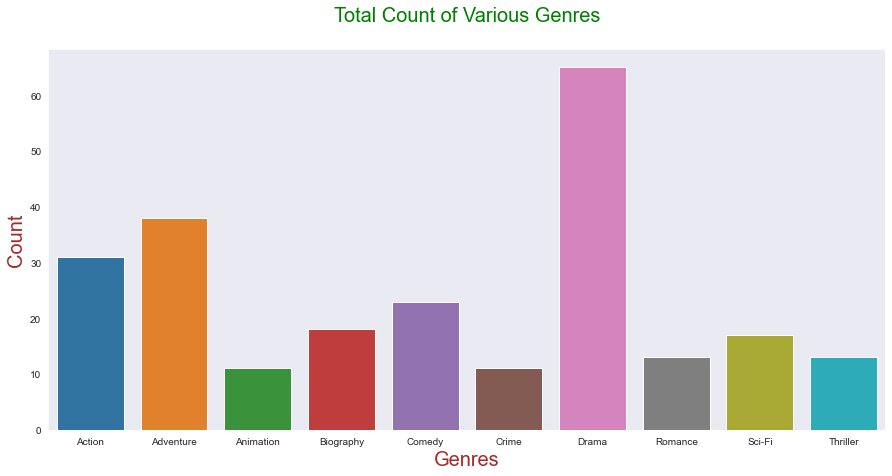

In [91]:
# Since the old dataframe cnt has been added lets do the analysis
plt.figure(figsize = [15,7])
sns.barplot(data = genre_top10, x = genre_top10.index, y = genre_top10.cnt)
plt.title('Total Count of Various Genres\n', fontdict = {'fontsize':20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Genres",fontdict = {'fontsize':20, 'fontweight' : 10, 'color' : 'Brown'})
plt.ylabel("Count",fontdict = {'fontsize':20, 'fontweight' : 10, 'color' : 'Brown'})
plt.show()

**`Checkpoint 5:`** Is the bar for `Drama` the tallest?

In [92]:
# Above barplot clearly shows that Drama receives the highest amount of votes 
# Drama genre movies are watched by everyone whereas audience for crime and animation is the least

-  ###  Subtask 3.3: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Make sure that you plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.
Refer to this link- https://seaborn.pydata.org/generated/seaborn.heatmap.html. You might have to plot something similar to the fifth chart in this page (You have to plot two such heatmaps side by side).

5. Repeat subtasks 1 to 4, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

You might need the below link for formatting your heatmap.
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

-  Note : Use `genre_top10` dataframe for this subtask

In [93]:
# 1st set of heat maps for CVotes-related columns
f_cvotes_genre = genre_top10.groupby(genre_top10.index)['CVotesU18F','CVotes1829F', 'CVotes3044F','CVotes45AF'].mean()

In [94]:
f_cvotes_genre

CVotesU18F  CVotes1829F  CVotes3044F  CVotes45AF
Action            525        36996        20627        4269
Adventure         601        39896        20750        4267
Animation         664        39314        17751        3063
Biography         265        29157        17354        4126
Comedy            459        37509        18841        3621
Crime             227        28310        17292        3658
Drama             317        29896        16964        3806
Romance           474        37926        17350        3381
Sci-Fi            613        45269        25620        5340
Thriller          322        36989        21922        4654

In [95]:
m_cvotes_genre = genre_top10.groupby(genre_top10.index)['CVotesU18M','CVotes1829M', 'CVotes3044M','CVotes45AM'].mean()

In [96]:
m_cvotes_genre

CVotesU18M  CVotes1829M  CVotes3044M  CVotes45AM
Action           1916       164703       132836       24092
Adventure        1900       146808       115795       21910
Animation        1486       103695        75824       12966
Biography         886       114043        92158       18039
Comedy           1178       109016        86346       15979
Crime             932       122690       102671       18799
Drama             915       105203        87644       17422
Romance           535        79024        62253       12054
Sci-Fi           2382       197123       160141       30141
Thriller         1327       156573       129421       24421

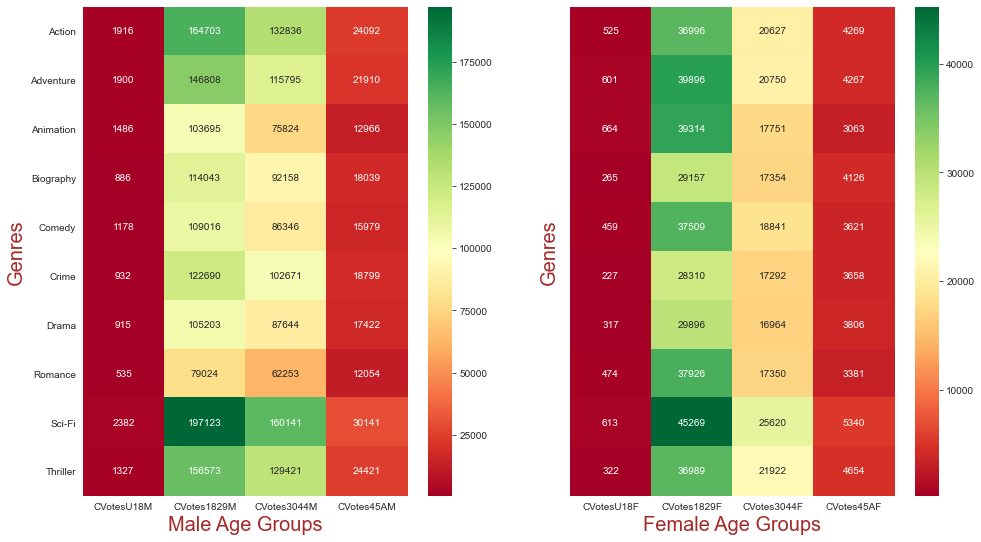

In [97]:
fig, ax =plt.subplots(1,2,figsize = (16,9))
gen_male = sns.heatmap(m_cvotes_genre, ax=ax[0],cmap="RdYlGn", annot=True, fmt = 'd' )
gen_male.set_ylabel('Genres',fontsize = 20, color = 'brown')
gen_male.set_xlabel('Male Age Groups',fontsize = 20,color = 'brown')
gen_male.set_yticklabels(genre_top10.index, fontsize = 10,rotation = 360)
gen_male.set_xticklabels(['CVotesU18M','CVotes1829M', 'CVotes3044M','CVotes45AM'],fontsize = 10)

gen_female = sns.heatmap(f_cvotes_genre, ax=ax[1],cmap="RdYlGn",fmt = 'd', annot=True)
gen_female.set_ylabel('Genres',fontsize = 20, color = 'brown')
gen_female.set_xlabel('Female Age Groups',fontsize = 20, color = 'brown')
gen_female.set_yticklabels([])
gen_female.set_xticklabels(['CVotesU18F','CVotes1829F', 'CVotes3044F','CVotes45AF'], fontsize = 10)
plt.show()


In [98]:
# As we can clearly see that males have voted more than females

**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1:Tenagers and voters at age group 45 and above have given least amount of votes to almost all the genres.
- Inference 2: Male voters are very fond of Si-Fi movies as compared to romantic and biography movies and among female votes love for Sci-Fi movies seems to be the highest and less fond of Crime movies.
- Inference 3: From the previous bar plot drama have recieved the highest number of counts however it doesn't have the highest votes from both male and female age groups.

In [99]:
# 2nd set of heat maps for Votes-related columns
f_votes_genre = genre_top10.groupby(genre_top10.index)['VotesU18F','Votes1829F', 'Votes3044F','Votes45AF'].mean()

In [100]:
f_votes_genre

VotesU18F  Votes1829F  Votes3044F  Votes45AF
Action          8.28        8.00        7.80       7.75
Adventure       8.29        8.09        7.87       7.84
Animation       8.25        8.20        7.98       7.88
Biography       8.16        7.93        7.77       7.87
Comedy          8.13        7.95        7.75       7.70
Crime           7.97        7.76        7.61       7.68
Drama           8.15        7.92        7.72       7.74
Romance         8.16        7.91        7.66       7.61
Sci-Fi          8.33        8.04        7.84       7.74
Thriller        8.07        7.88        7.70       7.75

In [101]:
m_votes_genre = genre_top10.groupby(genre_top10.index)['VotesU18M','Votes1829M', 'Votes3044M','Votes45AM'].mean()

In [102]:
m_votes_genre

VotesU18M  Votes1829M  Votes3044M  Votes45AM
Action          8.15        7.98        7.73       7.63
Adventure       8.14        8.01        7.73       7.64
Animation       7.97        7.99        7.72       7.65
Biography       8.14        7.98        7.72       7.66
Comedy          8.13        7.99        7.71       7.60
Crime           8.26        8.02        7.76       7.62
Drama           8.19        8.00        7.71       7.62
Romance         8.06        7.92        7.61       7.50
Sci-Fi          8.29        8.11        7.85       7.69
Thriller        8.21        8.02        7.75       7.64

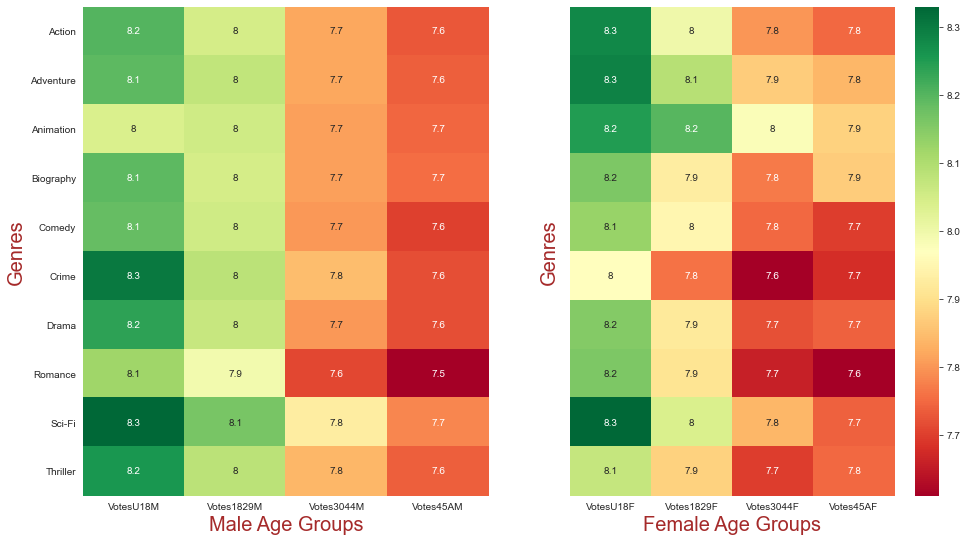

In [103]:
fig, ax =plt.subplots(1,2,figsize = (16,9))
gen_male1 = sns.heatmap(m_votes_genre, ax=ax[0],cmap="RdYlGn", annot=True, cbar = False )
gen_male1.set_ylabel('Genres',fontsize = 20, color = 'brown')
gen_male1.set_xlabel('Male Age Groups',fontsize = 20,color = 'brown')
gen_male1.set_yticklabels(genre_top10.index, fontsize = 10,rotation = 360)
gen_male1.set_xticklabels(['VotesU18M','Votes1829M', 'Votes3044M','Votes45AM'],fontsize = 10)

gen_female1 = sns.heatmap(f_votes_genre, ax=ax[1],cmap="RdYlGn", annot=True)
gen_female1.set_ylabel('Genres',fontsize = 20, color = 'brown')
gen_female1.set_xlabel('Female Age Groups',fontsize = 20, color = 'brown')
gen_female1.set_yticklabels([])
gen_female1.set_xticklabels(['VotesU18F','Votes1829F', 'Votes3044F','Votes45AF'], fontsize = 10)
plt.show()

**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1: Romance appaears to be the lowest rated genre in the age group 45 and above for both males and females
- Inference 2: Overall Sci-Fi, action and adventure have received more ratings by females whereas Sci-Fi and crime have been voted more by males
- Inference 3: Overall males and females under age group 30-44 and 45 above have given less ratings as compared to under 18 and 18-29 age groups.

-  ###  Subtask 3.4: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Create a column `IFUS` in the dataframe `movies`. The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Make use of the column `IFUS` to make this plot. Similarly, make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


3. Again do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. `VotesUS` is varying for the US and non-US movies. Similarly, make another subplot that shows how `VotesnUS` is varying for the US and non-US movies. Write any of your two inferences/observations from these plots.

Note : Use `movies` dataframe for this subtask. Make use of this documention to format your boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [104]:
# Creating IFUS column
movies['IFUS'] = movies['Country'].apply(lambda x: 'USA' if x == 'USA' else 'non-USA')

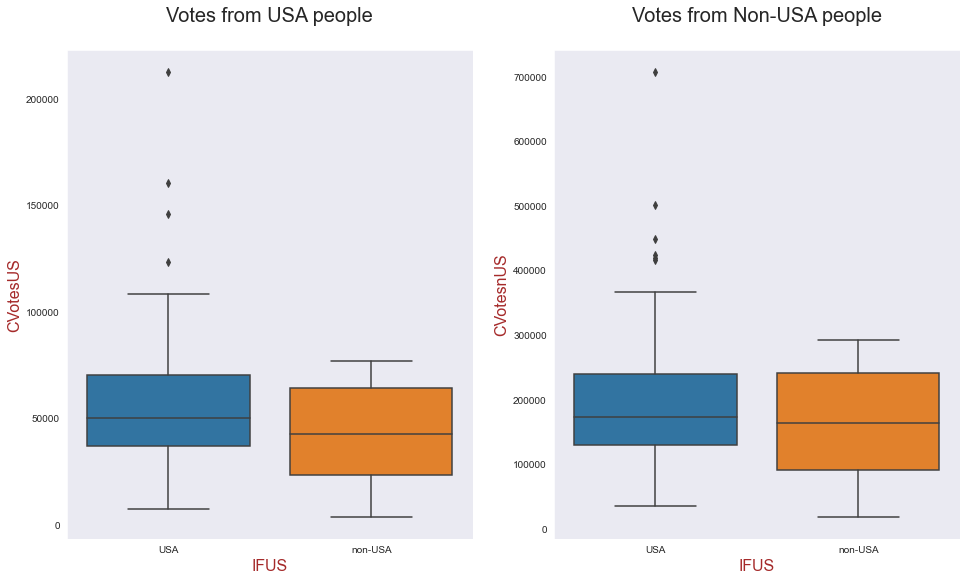

In [105]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)
sns.set_style('dark')
fig, axes = plt.subplots(1,2,figsize = (16,9))
# Boxplot for votes from USA people
v_usa = sns.boxplot(data = movies, x = 'IFUS', y = 'CVotesUS', ax=axes[0], palette = 'tab10')
v_usa.axes.set_title("Votes from USA people\n",fontsize = 20)
v_usa.set_xlabel('IFUS', fontsize = 16, color = 'Brown')
v_usa.set_ylabel('CVotesUS', fontsize = 16, color = 'Brown')

# Boxplot for votes from non USA people

v_nusa = sns.boxplot(data = movies, x = 'IFUS', y = 'CVotesnUS', ax=axes[1], palette = 'tab10')
v_nusa.axes.set_title("Votes from Non-USA people\n",fontsize = 20)
v_nusa.set_xlabel('IFUS', fontsize = 16, color = 'Brown')
v_nusa.set_ylabel('CVotesnUS', fontsize = 16, color = 'Brown')
plt.show()

**`Inferences:`** Write your two inferences/observations below:
- Inference 1: USA based movies are appreciated more by USA people than non USA based movies
- Inference 2: The love for USA based movies is almost on the same level as non-USA based movies by Non-USA people

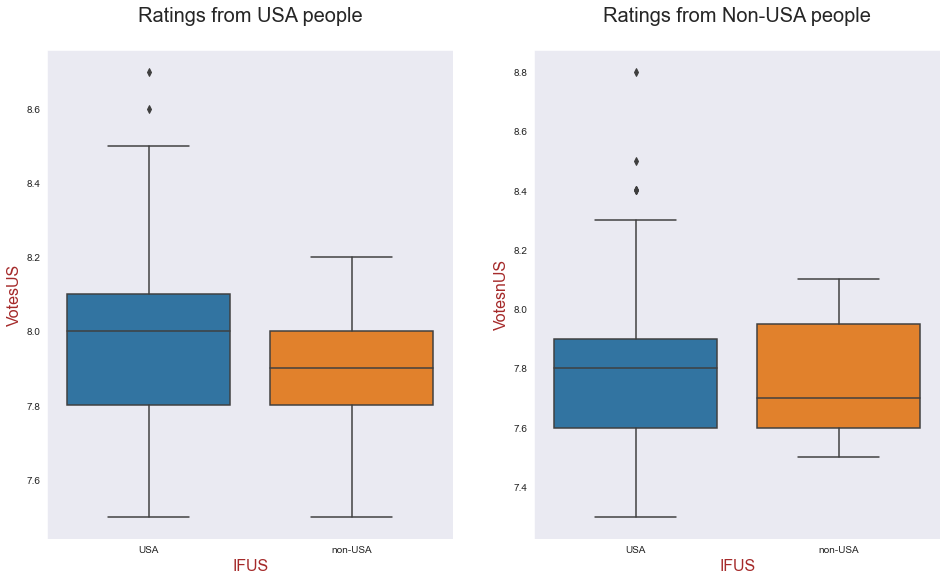

In [106]:
# Box plot - 2: VotesUS(y) vs IFUS(x)
sns.set_style('dark')
fig, axes = plt.subplots(1,2,figsize = (16,9))
# Boxplot for votes from USA people
v1_usa = sns.boxplot(data = movies, x = 'IFUS', y = 'VotesUS', ax=axes[0], palette = 'tab10')
v1_usa.axes.set_title("Ratings from USA people\n",fontsize = 20)
v1_usa.set_xlabel('IFUS', fontsize = 16, color = 'Brown')
v1_usa.set_ylabel('VotesUS', fontsize = 16, color = 'Brown')

# Boxplot for votes from non USA people

v_nusa = sns.boxplot(data = movies, x = 'IFUS', y = 'VotesnUS', ax=axes[1], palette = 'tab10')
v_nusa.axes.set_title("Ratings from Non-USA people\n",fontsize = 20)
v_nusa.set_xlabel('IFUS', fontsize = 16, color = 'Brown')
v_nusa.set_ylabel('VotesnUS', fontsize = 16, color = 'Brown')
plt.show()

**`Inferences:`** Write your two inferences/observations below:
- Inference 1: USA based movies have been rated highest by both USA and Non-USA people which can be noticed by observing thier upper fence
- Inference 2: Non-USA based movies have been rated critically and overall received less ratings by both USA and Non-USA people

-  ###  Subtask 3.5:  Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [107]:
# Sorting by CVotes1000
genre_top10_CVotes1000 = genre_top10.sort_values(by = 'CVotes1000', ascending  = False)

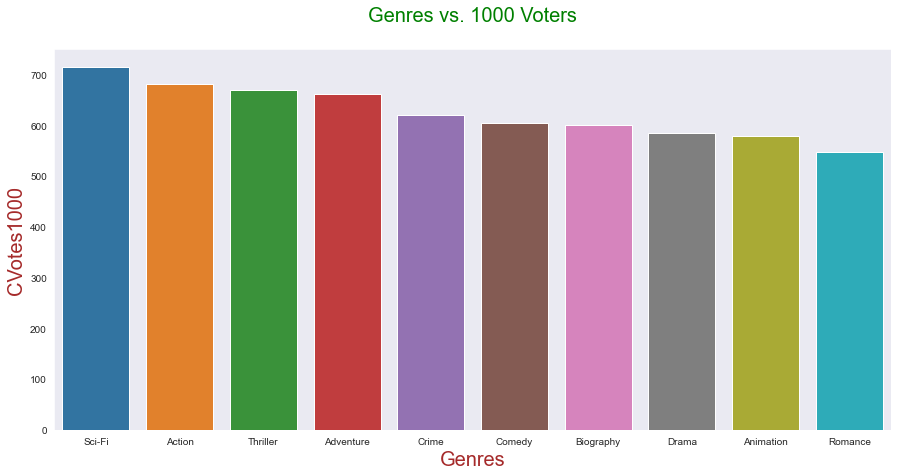

In [108]:
# Bar plot
sns.set_style('dark')
plt.figure(figsize = [15,7])
sns.barplot(data = genre_top10_CVotes1000, x = genre_top10_CVotes1000.index, y = genre_top10_CVotes1000.CVotes1000)
plt.title('Genres vs. 1000 Voters\n', fontdict = {'fontsize':20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Genres",fontdict = {'fontsize':20, 'fontweight' : 10, 'color' : 'Brown'})
plt.ylabel("CVotes1000",fontdict = {'fontsize':20, 'fontweight' : 10, 'color' : 'Brown'})
plt.show()

**`Inferences:`** Write your inferences/observations here.
-  Sci-Fi seems to be the most popular and romance seems to be the least popular among the top 1000 voters
-  Drama is not on the top 5 list of 1000 voters however in the earlier plot, it has the highest count
-  Overall, Action, thriller, Adventure seems to be more popular almost on the same range as compared to Drama, Animation and Biography genres.


**`Checkpoint 6:`** The genre `Romance` seems to be most unpopular among the top 1000 voters.
- Yes, the genre romance seems to be least favourite among the top 1000 voters

With the above subtask, your assignment is over. In your free time, do explore the dataset further on your own and see what kind of other insights you can get across various other columns.